# Moive Genre Classification
Create a machine learning model that can predict the genre of a movie 
based on its plot summary or other textual information. You can use 
techniques like TF-IDF or word embeddings with classifiers such as Naive 
Bayes, Logistic Regression, or Support Vector Machines. 

In [29]:
# Required Libraries 
# type: ignore

import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [2]:
# Load Data sets

train_data_path = 'D:/Encryptix/Genre Classification Dataset/train_data.txt'
test_data_path = 'D:/Encryptix/Genre Classification Dataset/test_data.txt'
test_data_solution_path = 'D:/Encryptix/Genre Classification Dataset/test_data_solution.txt'

In [3]:
# Data Preprocessing 

def load_train_data(train_data_path):
    data = pd.read_csv(train_data_path, delimiter=' ::: ', engine='python', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
    return data

def load_test_data(test_data_path):
    data = pd.read_csv(train_data_path, delimiter=' ::: ', engine='python', names=['ID', 'TITLE', 'DESCRIPTION'])
    return data

def load_test_solution(test_data_solution_path):
    data = pd.read_csv(test_data_solution_path, delimiter=' ::: ', engine='python', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
    return data

In [4]:
train_df = load_train_data(train_data_path)
test_df = load_test_data(test_data_path)
test_solution_df = load_test_solution(test_data_solution_path)

In [5]:
train_df.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [6]:
test_df.head()

,ID,TITLE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [7]:
test_solution_df.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a marti...


In [8]:
# Text preprocessing

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()

In [9]:
train_df['DESCRIPTION'] = train_df['DESCRIPTION'].apply(preprocess_text)
test_df['DESCRIPTION'] = test_df['DESCRIPTION'].apply(preprocess_text)

print(train_df['DESCRIPTION'])

0        listening in to a conversation between his doc...
1        a brother and sister with a past incestuous re...
2        as the bus empties the students for their fiel...
3        to help their unemployed father make ends meet...
4        the films title refers not only to the unrecov...
                               ...                        
54209    this shortlived nbc live sitcom centered on bo...
54210    the next generation of exploitation the sister...
54211    ze bestaan echt is a standup comedy about grow...
54212    walter and vivian live in the country and have...
54213    on labor day weekend  the most intense hurrica...
Name: DESCRIPTION, Length: 54214, dtype: object


([<matplotlib.patches.Wedge at 0x22beefe9fa0>,
 [Text(0.7751310052677347, 0.7804946666522656, ' drama '),
  Text(-0.762411592605899, 0.7929240590751027, ' thriller '),
  Text(-1.0193079400360507, -0.41353515374084354, ' adult '),
  Text(-0.4882199992075867, -0.9857186375298705, ' documentary '),
  Text(-0.04199629696967724, -1.0991980308574225, ' comedy '),
  Text(0.19879898575660607, -1.0818867608313474, ' crime '),
  Text(0.3773134294046659, -1.0332640398227795, ' reality-tv '),
  Text(0.5139243650170421, -0.9725645207603609, ' horror '),
  Text(0.6185204948981458, -0.9096331114196278, ' sport '),
  Text(0.7034192435309771, -0.8456957891761719, ' animation '),
  Text(0.7768477821813463, -0.7787859290716056, ' action '),
  Text(0.8417695873925628, -0.7081129583201785, ' fantasy '),
  Text(0.8964960475145264, -0.6374126111011863, ' short '),
  Text(0.9425508211632994, -0.5670960672799541, ' sci-fi '),
  Text(0.9807459110791389, -0.49813397585544206, ' music '),
  Text(1.010359106500896

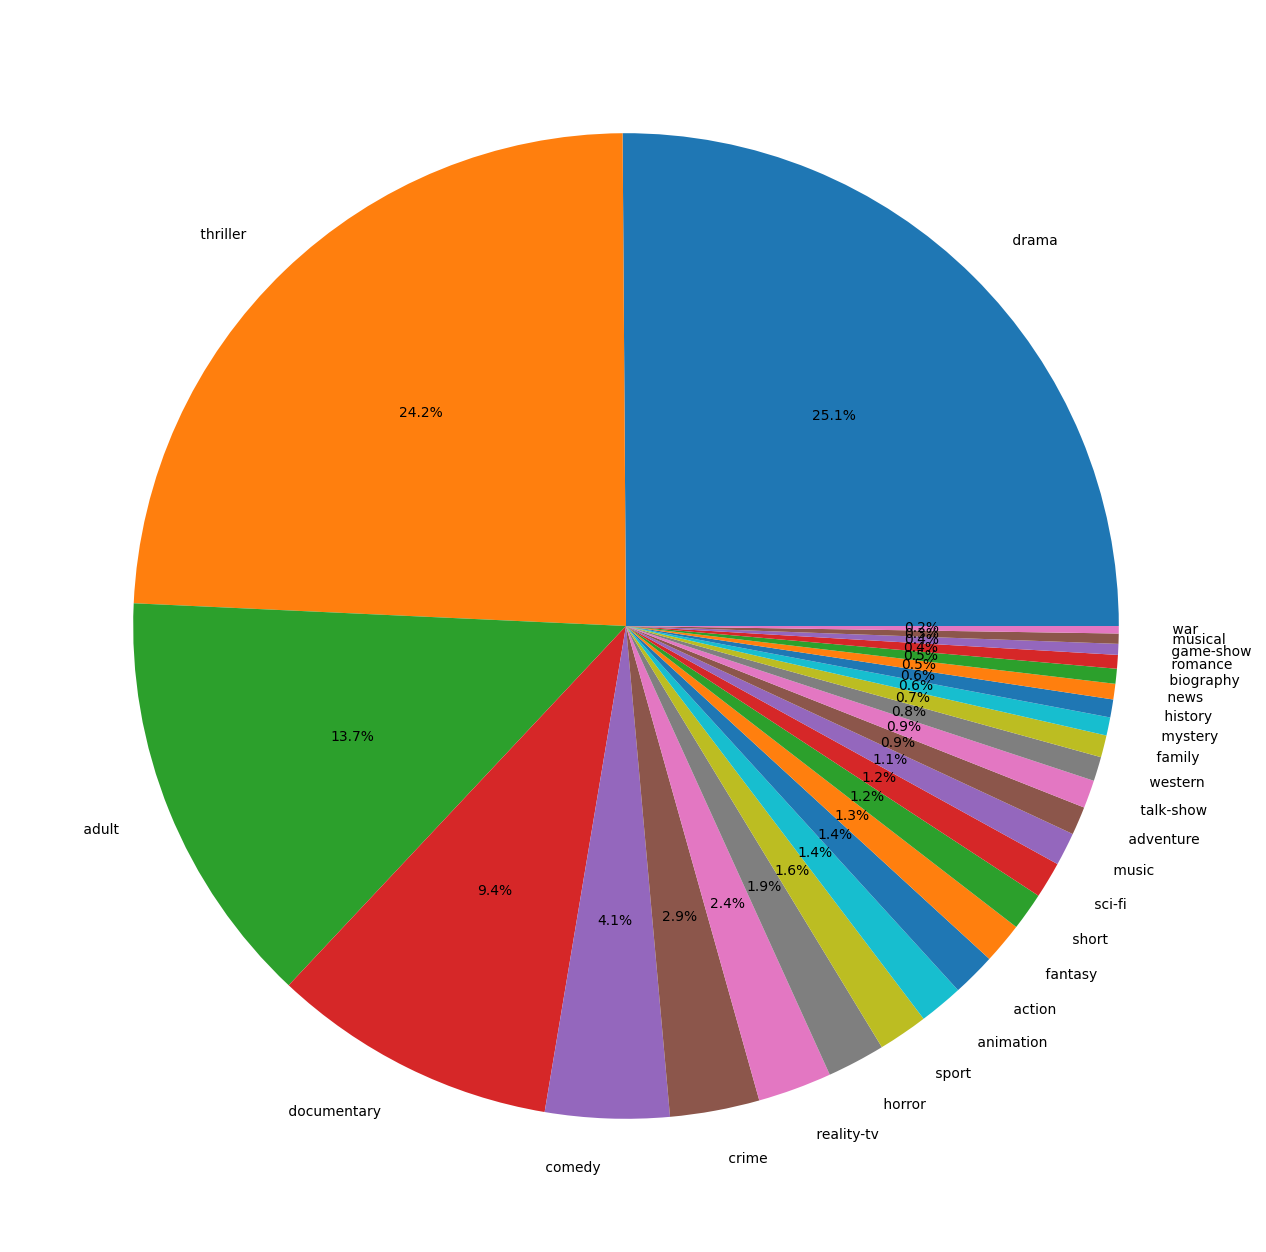

In [28]:
plt.figure(figsize=(16,16))
plt.pie(train_df['GENRE'].value_counts(),labels=[' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '],autopct='%0.1f%%')

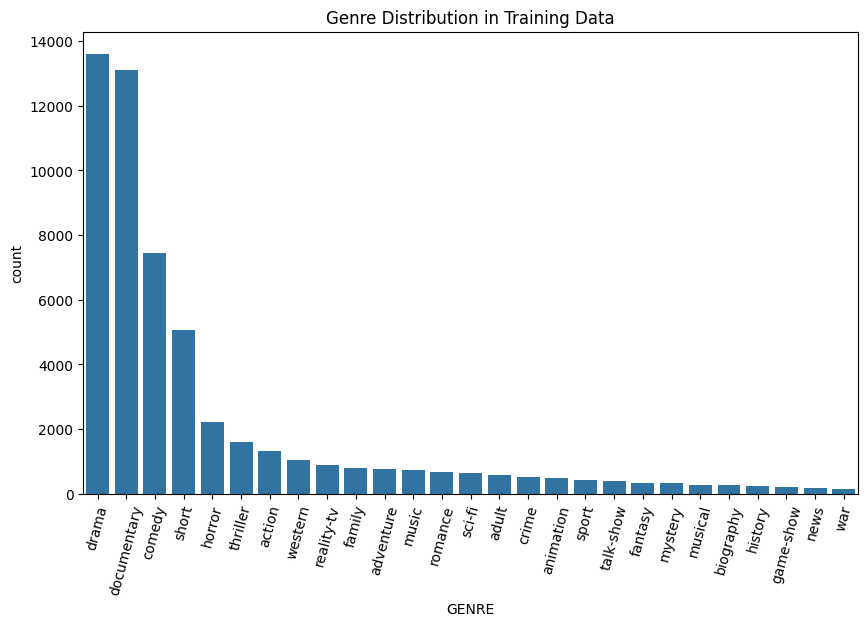

In [10]:
# Graphs

plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='GENRE', order=train_df['GENRE'].value_counts().index)
plt.title('Genre Distribution in Training Data')
plt.xticks(rotation=75)
plt.show()

In [11]:
# TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

In [12]:
# fit the model

X_train_tfidf_matrix = tfidf.fit_transform(train_df['DESCRIPTION'])
X_test_tfidf_matrix = tfidf.transform(test_df['DESCRIPTION'])

In [13]:
print("TF-IDF Matrix Shape:", X_train_tfidf_matrix.shape)

# Check feature names
print("Vocabulary:", tfidf.get_feature_names_out())

# View the matrix (dense form for simplicity)
print("Matrix (Dense):\n", X_train_tfidf_matrix.toarray())

TF-IDF Matrix Shape: (54214, 5000)
Vocabulary: ['aaron' 'abandon' 'abandoned' ... 'zombies' 'zone' 'zoo']
Matrix (Dense):
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Logistic Regression

In [14]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf_matrix, train_df['GENRE'])
predictions = lr.predict(X_test_tfidf_matrix)
print(accuracy_score(train_df['GENRE'], predictions))
print(confusion_matrix(train_df['GENRE'], predictions))
print(classification_report(train_df['GENRE'], predictions))

0.6668019330800162
[[  559     1     4     1     0   109     1   121   376     1     1     0
      0    27     0     1     0     0     4     0    16    33    18     0
     31     0    11]
 [    1   235    23     0     0   140     0    26   116     0     0     0
      0     5     1     0     0     0     0     0     0    39     0     0
      1     0     3]
 [   22    19   200     3     0    92     1   126   215     5     2     0
      0    22     0     0     0     0     6     1     9    38     2     1
      6     0     5]
 [   14     0     5   111     0   112     0    63    83    16     2     0
      0    17     3     0     0     0     0     0    19    50     0     0
      1     0     2]
 [    0     0     0     0     0    13     2   177    52     0     0     0
      0     1     2     0     0     0     0     0     0    17     0     0
      1     0     0]
 [   36     4     4     1     0  5180     3   351  1566     1     1     0
      0    56     7     1     1     1    12     4     9   177 

c:\Users\Karan Shukla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Karan Shukla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      action       0.66      0.43      0.52      1315
       adult       0.82      0.40      0.54       590
   adventure       0.78      0.26      0.39       775
   animation       0.85      0.22      0.35       498
   biography       0.00      0.00      0.00       265
      comedy       0.63      0.70      0.66      7447
       crime       0.65      0.10      0.17       505
 documentary       0.72      0.90      0.80     13096
       drama       0.61      0.84      0.71     13613
      family       0.73      0.17      0.28       784
     fantasy       0.78      0.09      0.16       323
   game-show       0.95      0.61      0.74       194
     history       0.00      0.00      0.00       243
      horror       0.76      0.71      0.73      2204
       music       0.77      0.55      0.64       731
     musical       0.70      0.07      0.12       277
     mystery       0.81      0.07      0.12       319
        news       0.84    

c:\Users\Karan Shukla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


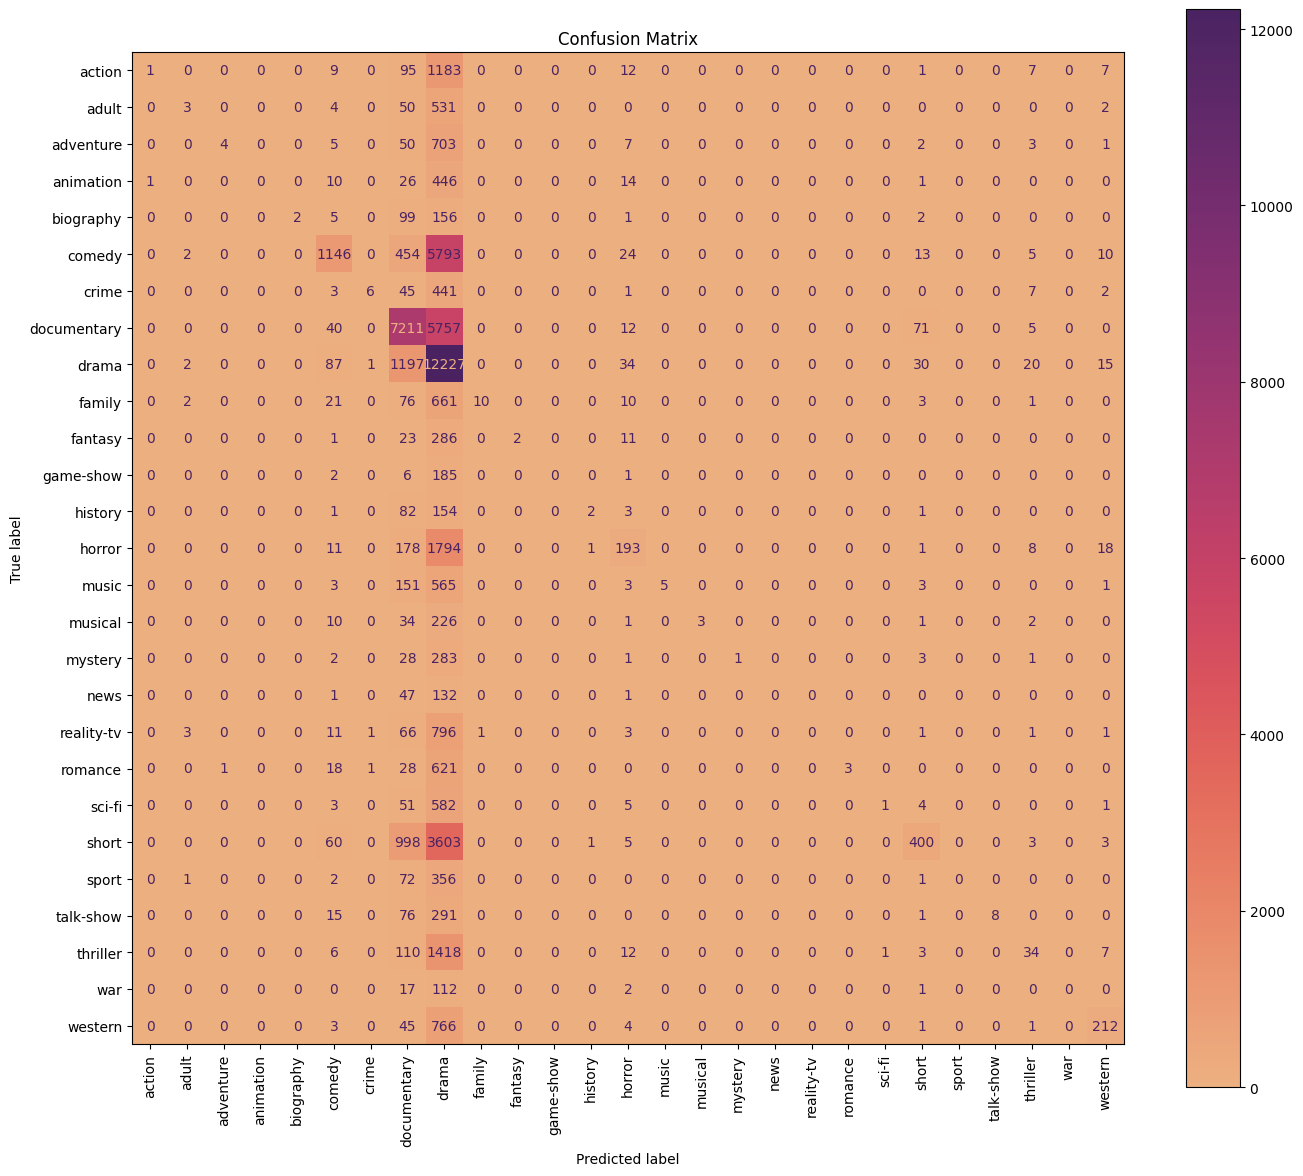

In [78]:
# Using rcParams for global size
plt.rcParams['figure.figsize'] = [16, 14]
ConfusionMatrixDisplay.from_predictions(train_df['GENRE'], predictions, cmap='flare', colorbar=True)
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.show()


## Support Vector Machine

In [ ]:
svc = SVC(kernel='sigmoid', gamma=0.1, C=10, max_iter=1000)
svc.fit(X_train_tfidf_matrix, train_df['GENRE'])
predictions_2 = svc.predict(X_test_tfidf_matrix)
print(accuracy_score(train_df['GENRE'], predictions_2))
print(confusion_matrix(train_df['GENRE'], predictions_2))
print(classification_report(train_df['GENRE'], predictions_2))

c:\Users\Karan Shukla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
# Using rcParams for global size
plt.rcParams['figure.figsize'] = [16, 14]
ConfusionMatrixDisplay.from_predictions(train_df['GENRE'], predictions_2, cmap='flare', colorbar=True)
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.show()

## Multinomial Naive Bayes

In [53]:
mnb = MultinomialNB()
mnb.fit(X_train_tfidf_matrix, train_df['GENRE'])
predictions_3 = mnb.predict(X_test_tfidf_matrix)
print(accuracy_score(train_df['GENRE'], predictions_3))
print(confusion_matrix(train_df['GENRE'], predictions_3))
print(classification_report(train_df['GENRE'], predictions_3))

0.5543770981665253
[[  202     0     1     0     0   106     0   243   702     0     0     0
      0    23     0     0     0     0     0     0     6     9    12     0
      4     0     7]
 [    1    66    18     0     0   202     0    45   231     0     0     0
      0     4     0     0     0     0     0     0     0    23     0     0
      0     0     0]
 [    7    13    81     0     0    80     0   211   341     0     0     0
      0    22     0     0     0     0     1     0     1    12     0     0
      1     0     5]
 [    3     0     0     5     0   110     0   147   191     1     0     0
      0    14     2     0     0     0     0     0     1    22     0     0
      0     0     2]
 [    0     0     0     0     0    10     0   195    56     0     0     0
      0     1     0     0     0     0     0     0     0     2     0     0
      1     0     0]
 [   11     0     1     0     0  3661     0   737  2959     0     0     0
      0    31     2     0     0     0     1     0     0    40 

c:\Users\Karan Shukla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Karan Shukla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      action       0.68      0.15      0.25      1315
       adult       0.81      0.11      0.20       590
   adventure       0.76      0.10      0.18       775
   animation       1.00      0.01      0.02       498
   biography       0.00      0.00      0.00       265
      comedy       0.56      0.49      0.52      7447
       crime       0.00      0.00      0.00       505
 documentary       0.59      0.89      0.71     13096
       drama       0.48      0.84      0.61     13613
      family       0.88      0.01      0.02       784
     fantasy       0.00      0.00      0.00       323
   game-show       0.97      0.31      0.47       194
     history       0.00      0.00      0.00       243
      horror       0.76      0.45      0.57      2204
       music       0.88      0.25      0.39       731
     musical       0.00      0.00      0.00       277
     mystery       0.00      0.00      0.00       319
        news       0.00    

c:\Users\Karan Shukla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


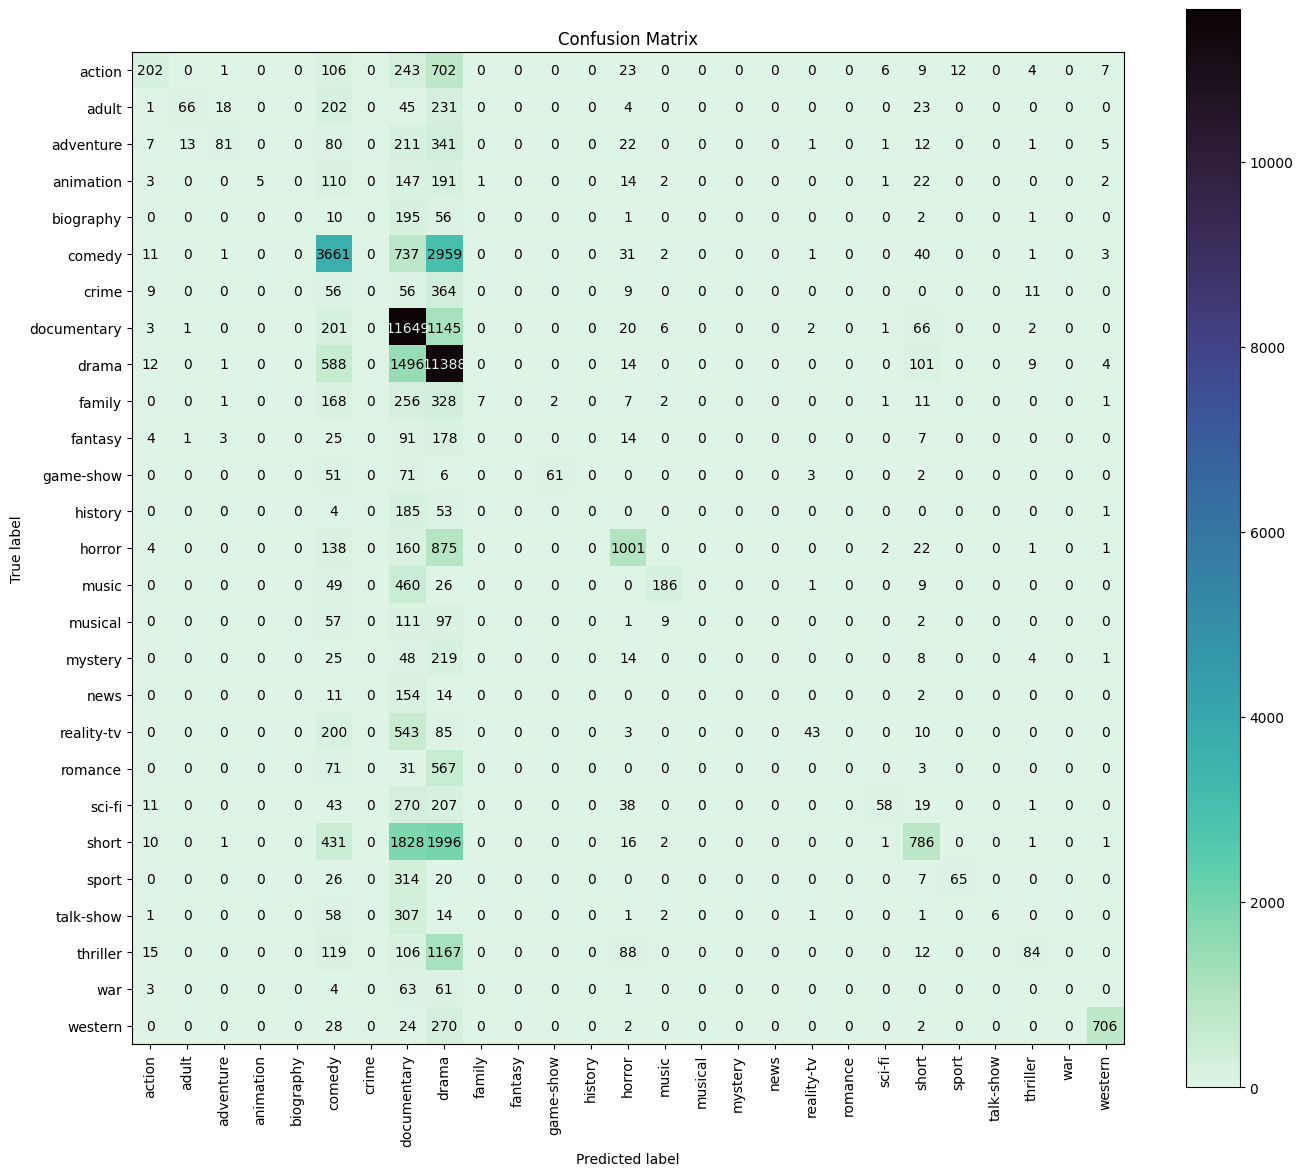

In [95]:
# Using rcParams for global size
plt.rcParams['figure.figsize'] = [16, 14]
ConfusionMatrixDisplay.from_predictions(train_df['GENRE'], predictions_3, cmap='mako_r', colorbar=True)
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.show()

## Random Forest

In [66]:
rf = RandomForestClassifier(n_estimators=100, random_state=2)
rf.fit(X_train_tfidf_matrix, train_df['GENRE'])
predictions_4 = rf.predict(X_test_tfidf_matrix)
print(accuracy_score(train_df['GENRE'], predictions_4))
print(confusion_matrix(train_df['GENRE'], predictions_4))
print(classification_report(train_df['GENRE'], predictions_4))

0.9993175194599181
[[ 1314     0     0     0     0     0     0     0     1     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    0   590     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    0     0   773     0     0     1     0     0     1     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    0     0     0   496     0     2     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    0     0     0     0   265     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    0     0     1     0     0  7437     0     0     8     0     0     0
      0     0     0     0     0     0     0     0     0     0 

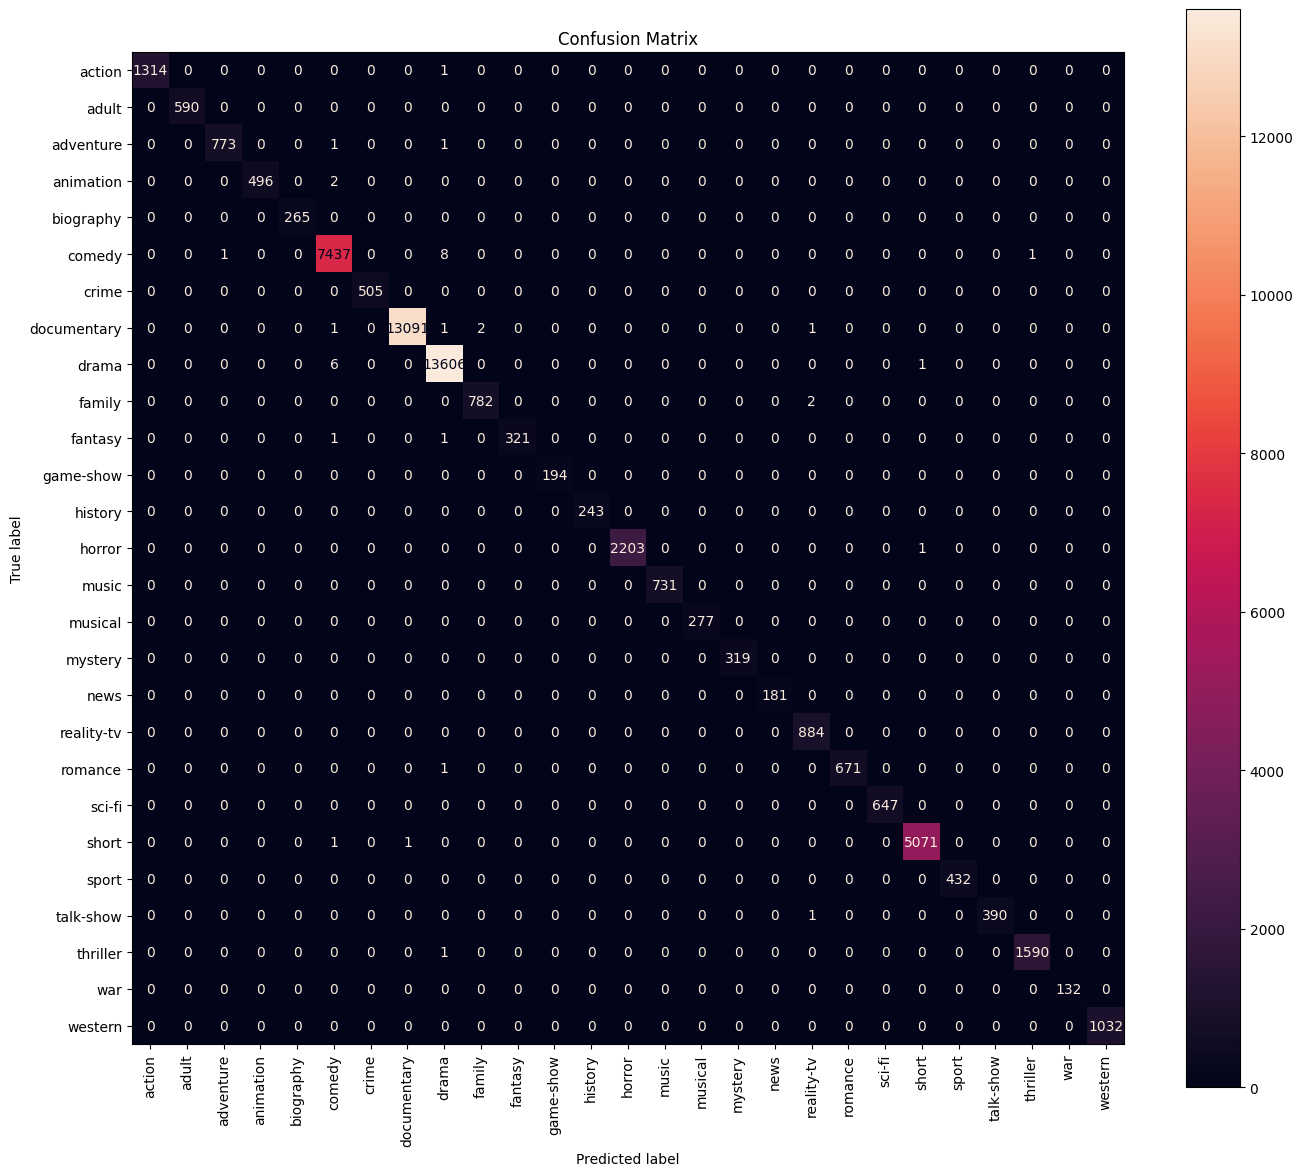

In [94]:
# Using rcParams for global size
plt.rcParams['figure.figsize'] = [16, 14]
ConfusionMatrixDisplay.from_predictions(train_df['GENRE'], predictions_4, cmap='rocket', colorbar=True)
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.show()

## Decision Tree Classifier

In [86]:
dtc = DecisionTreeClassifier(max_depth=10)
dtc.fit(X_train_tfidf_matrix, train_df['GENRE'])
predictions_5 = dtc.predict(X_test_tfidf_matrix)
print(accuracy_score(train_df['GENRE'], predictions_5))
print(confusion_matrix(train_df['GENRE'], predictions_5))
print(classification_report(train_df['GENRE'], predictions_5))

0.3960785037075294
[[    2     0     0     0     0     9     0    94  1183     0     0     0
      0    12     0     0     0     0     0     0     0     1     0     0
      7     0     7]
 [    0     2     0     0     0     4     0    51   531     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     2]
 [    0     0     4     0     0     5     0    50   703     0     0     0
      0     7     0     0     0     0     0     0     0     2     0     0
      3     0     1]
 [    1     0     0     0     0    10     0    26   446     0     0     0
      0    14     0     0     0     0     0     0     0     1     0     0
      0     0     0]
 [    0     0     0     0     2     5     0    99   156     0     0     0
      0     1     0     0     0     0     0     0     0     2     0     0
      0     0     0]
 [    0     2     0     0     0  1146     0   454  5793     0     0     0
      0    24     0     0     0     0     0     0     0    13 

c:\Users\Karan Shukla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Karan Shukla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      action       0.50      0.00      0.00      1315
       adult       0.18      0.00      0.01       590
   adventure       0.80      0.01      0.01       775
   animation       0.00      0.00      0.00       498
   biography       1.00      0.01      0.01       265
      comedy       0.77      0.15      0.26      7447
       crime       0.80      0.01      0.02       505
 documentary       0.64      0.55      0.59     13096
       drama       0.31      0.90      0.46     13613
      family       0.91      0.01      0.03       784
     fantasy       1.00      0.01      0.01       323
   game-show       0.00      0.00      0.00       194
     history       0.50      0.01      0.02       243
      horror       0.53      0.09      0.15      2204
       music       1.00      0.01      0.01       731
     musical       1.00      0.01      0.02       277
     mystery       1.00      0.00      0.01       319
        news       0.00    

c:\Users\Karan Shukla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


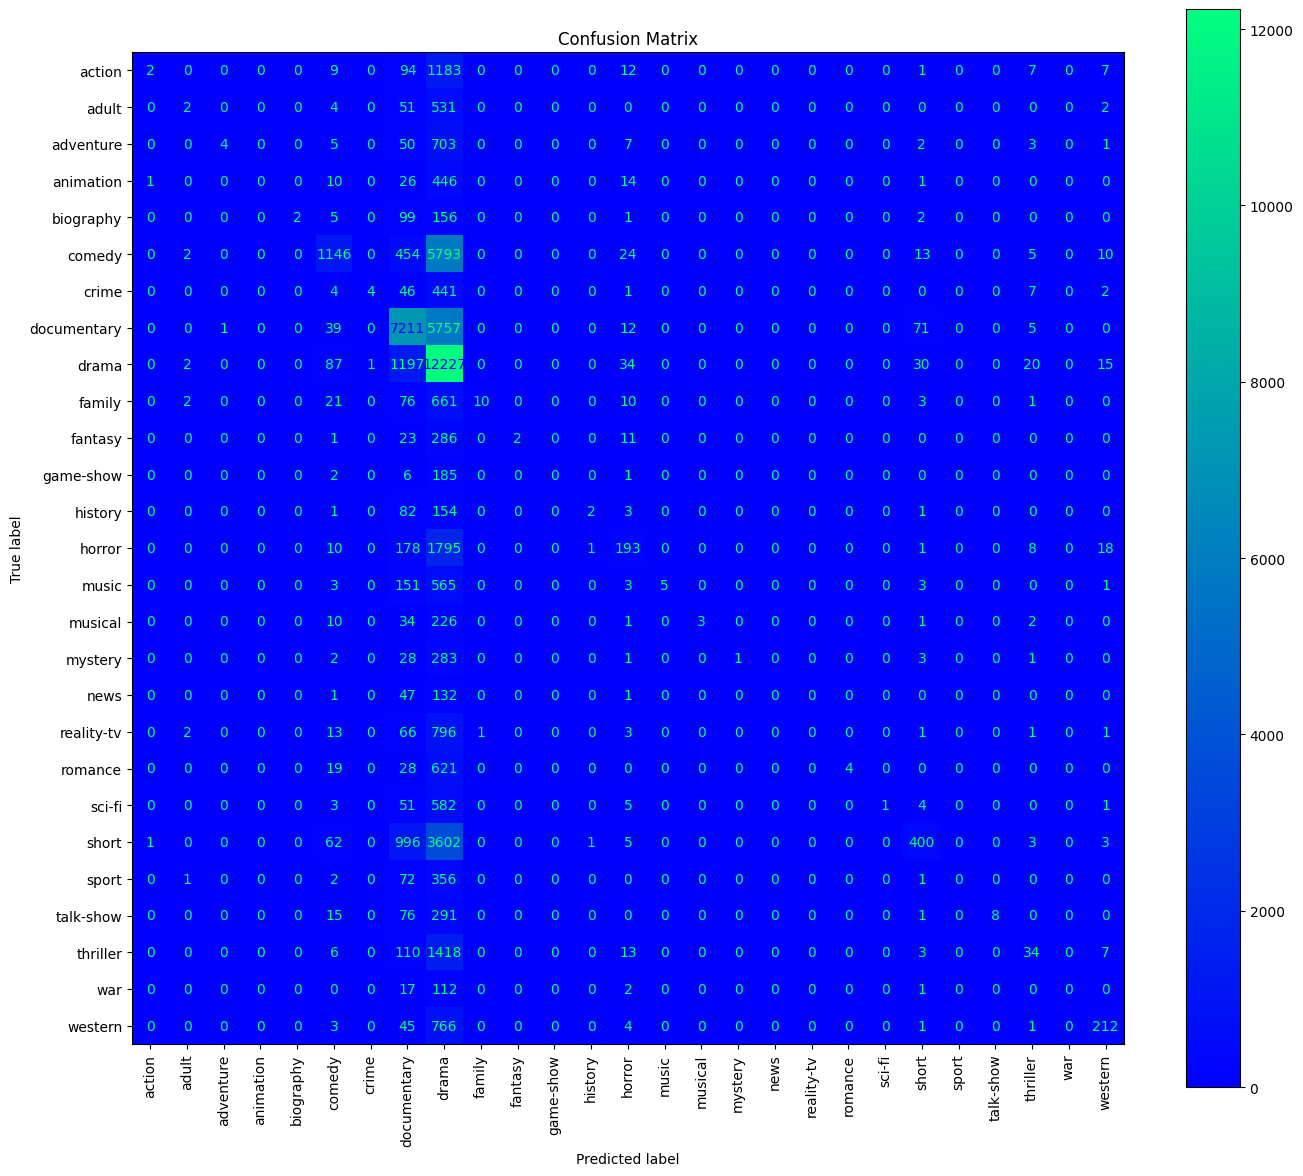

In [104]:
# Using rcParams for global size
plt.rcParams['figure.figsize'] = [16, 14]
ConfusionMatrixDisplay.from_predictions(train_df['GENRE'], predictions_5, cmap='winter', colorbar=True)
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.show()

## Models

In [19]:
models = {
    'LogisticRegression': lr,
    'RandomForest': rf,
    'MultinomialNB': mnb,
    'DecicionTree': dtc
}

In [106]:
for model_name, model in models.items():
    model.fit(X_train_tfidf_matrix, train_df['GENRE'])
    y_test_pred = model.predict(X_test_tfidf_matrix)

    test_df['PREDICTED_GENRE'] = y_test_pred
    test_df['ID'] = test_df['ID'].astype(str)
    test_solution_df['ID'] = test_solution_df['ID'].astype(str)
    merged_df = test_df.merge(test_solution_df[['ID', 'GENRE']], on='ID', how='left', suffixes=('', '_TRUE')) 

    print(merged_df[['ID', 'TITLE', 'PREDICTED_GENRE', 'GENRE']])


                                               ID        TITLE  \
0                    Oscar et la dame rose (2009)        drama   
1                                    Cupid (1997)     thriller   
2                Young, Wild and Wonderful (1980)        adult   
3                           The Secret Sin (1915)        drama   
4                          The Unrecovered (2007)        drama   
...                                           ...          ...   
54209                             "Bonino" (1953)       comedy   
54210                 Dead Girls Don't Cry (????)       horror   
54211   Ronald Goedemondt: Ze bestaan echt (2008)  documentary   
54212                    Make Your Own Bed (1944)       comedy   
54213  Nature's Fury: Storm of the Century (2006)      history   

      PREDICTED_GENRE GENRE  
0               drama   NaN  
1            thriller   NaN  
2              comedy   NaN  
3               drama   NaN  
4               short   NaN  
...               ...   ...